In [1]:
import pandas as pd

# Set display options to show more data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)       
pd.set_option('display.width', None)       

# Load PBJ data
pbj_file_path = 'data/PBJ_Q2_2024.csv'
try:
    pbj_data = pd.read_csv(pbj_file_path, encoding='utf-8', low_memory=False, dtype={'PROVNUM': str})
except UnicodeDecodeError:
    print("UTF-8 decoding failed for PBJ data, trying latin1...")
    pbj_data = pd.read_csv(pbj_file_path, encoding='latin1', low_memory=False, dtype={'PROVNUM': str})

# Load NH data
nh_file_path = 'data/NH_PInfo_Feb2025.csv'
try:
    quality_data = pd.read_csv(nh_file_path, encoding='utf-8', low_memory=False, dtype={'CMS Certification Number (CCN)': str})
except UnicodeDecodeError:
    print("UTF-8 decoding failed for NH data, trying latin1...")
    quality_data = pd.read_csv(nh_file_path, encoding='latin1', low_memory=False, dtype={'CMS Certification Number (CCN)': str})

# Display the data
print("PBJ Data:")
print(pbj_data.head())
print("\nPBJ Columns:", pbj_data.columns.tolist())

print("\nQuality Ratings Data:")
print(quality_data.head())
print("\nQuality Columns:", quality_data.columns.tolist())

UTF-8 decoding failed for PBJ data, trying latin1...
PBJ Data:
  PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  Hrs_RNDON_emp  \
0           59  2024Q2  20240401         51      10.77          10.77   
1           59  2024Q2  20240402         52       8.43           8.43   
2           59  2024Q2  20240403         53      11.13          11.13   
3           59  2024Q2  20240404         52      12.27          12.27   
4           59  2024Q2  20240405         52       4.95           4.95   

   Hrs_RNDON_ctr  Hrs_RNadmin  Hrs_RNadmin_emp  Hrs_RNadmin_ctr  Hrs_RN

In [2]:
#Check for Missing Data
print("PBJ Data Missing Values:")
print(pbj_data.isnull().sum())

print("\nQuality Data Missing Values:")
print(quality_data.isnull().sum())

PBJ Data Missing Values:
PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

Quality Data Missing Values:
CMS Certification Number (CCN)                                               0
Provider Name                                                                0
Provider Address                                

In [3]:
#Drop the Geocoding Footnote column
quality_data = quality_data.drop(columns=['Geocoding Footnote'])

In [4]:
#Merge the Datasets 
merged_data = pd.merge(
    pbj_data,
    quality_data,
    left_on='PROVNUM',
    right_on='CMS Certification Number (CCN)',
    how='inner'
)



In [5]:
#Display Merged Datasets 
print("Merged Data:")
print(merged_data.head())

Merged Data:
  PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  Hrs_RNDON_emp  \
0           59  2024Q2  20240401         51      10.77          10.77   
1           59  2024Q2  20240402         52       8.43           8.43   
2           59  2024Q2  20240403         53      11.13          11.13   
3           59  2024Q2  20240404         52      12.27          12.27   
4           59  2024Q2  20240405         52       4.95           4.95   

   Hrs_RNDON_ctr  Hrs_RNadmin  Hrs_RNadmin_emp  Hrs_RNadmin_ctr  Hrs_RN  \
0            0.0        10.40            10.40

In [6]:
#Display full list

print("Merged Data Columns:")
print(merged_data.columns.tolist())

Merged Data Columns:
['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr', 'CMS Certification Number (CCN)', 'Provider Name', 'Provider Address', 'City/Town', 'State', 'ZIP Code', 'Telephone Number', 'Provider SSA County Code', 'County/Parish', 'Ownership Type', 'Number of Certified Beds', 'Average Number of Residents per Day', 'Average Number of Residents per Day Footnote', 'Provider Type', 'Provider Resides in Hospital', 'Legal Business Name', 'Date First Approved to Provide Medicare and Medicaid Services', 'Affiliated Entity Name', 'Affiliated Entity ID', 'Contin

In [7]:
#Clean Merged Data by Removing Unnecessary columns 

columns_to_drop = [
    'Telephone Number', 'ZIP Code', 'Geocoding Footnote', 'Provider SSA County Code', 
    'Average Number of Residents per Day Footnote', 'Provider Type', 
    'Provider Resides in Hospital', 'Legal Business Name', 
    'Date First Approved to Provide Medicare and Medicaid Services', 
    'Affiliated Entity Name', 'Affiliated Entity ID', 'Continuing Care Retirement Community', 
    'Special Focus Status', 'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago', 
    'Provider Changed Ownership in Last 12 Months', 'With a Resident and Family Council', 
    'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating Footnote', 
    'Health Inspection Rating Footnote', 'QM Rating Footnote', 'Long-Stay QM Rating Footnote', 
    'Short-Stay QM Rating Footnote', 'Staffing Rating Footnote', 'Reported Staffing Footnote', 
    'Physical Therapist Staffing Footnote', 'Total nursing staff turnover footnote', 
    'Registered Nurse turnover footnote', 'Administrator turnover footnote', 
    'Rating Cycle 1 Standard Survey Health Date', 'Rating Cycle 1 Total Number of Health Deficiencies', 
    'Rating Cycle 1 Number of Standard Health Deficiencies', 'Rating Cycle 1 Number of Complaint Health Deficiencies', 
    'Rating Cycle 1 Health Deficiency Score', 'Rating Cycle 1 Number of Health Revisits', 
    'Rating Cycle 1 Health Revisit Score', 'Rating Cycle 1 Total Health Score', 
    'Rating Cycle 2 Standard Health Survey Date', 'Rating Cycle 2 Total Number of Health Deficiencies', 
    'Rating Cycle 2 Number of Standard Health Deficiencies', 'Rating Cycle 2 Number of Complaint Health Deficiencies', 
    'Rating Cycle 2 Health Deficiency Score', 'Rating Cycle 2 Number of Health Revisits', 
    'Rating Cycle 2 Health Revisit Score', 'Rating Cycle 2 Total Health Score', 
    'Rating Cycle 3 Standard Health Survey Date', 'Rating Cycle 3 Total Number of Health Deficiencies', 
    'Rating Cycle 3 Number of Standard Health Deficiencies', 'Rating Cycle 3 Number of Complaint Health Deficiencies', 
    'Rating Cycle 3 Health Deficiency Score', 'Rating Cycle 3 Number of Health Revisits', 
    'Rating Cycle 3 Health Revisit Score', 'Rating Cycle 3 Total Health Score', 
    'Total Weighted Health Survey Score', 'Number of Facility Reported Incidents', 
    'Number of Substantiated Complaints', 'Number of Citations from Infection Control Inspections', 
    'Number of Fines', 'Total Amount of Fines in Dollars', 'Number of Payment Denials', 
    'Total Number of Penalties'
]

# Only existing columns are dropped
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_data.columns]

# Drop only the columns that exist
merged_data = merged_data.drop(columns=existing_columns_to_drop)

# Print missing columns (if any)
missing_columns = set(columns_to_drop) - set(existing_columns_to_drop)
if missing_columns:
    print("Warning: These columns were not found in the dataset and were not dropped:", missing_columns)




In [8]:
#Verify updated columns 
print("Updated Columns:")
print(merged_data.columns.tolist())

Updated Columns:
['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr', 'CMS Certification Number (CCN)', 'Provider Name', 'Provider Address', 'City/Town', 'State', 'County/Parish', 'Ownership Type', 'Number of Certified Beds', 'Average Number of Residents per Day', 'Overall Rating', 'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating', 'Short-Stay QM Rating', 'Staffing Rating', 'Reported Nurse Aide Staffing Hours per Resident per Day', 'Reported LPN Staffing Hours per Resident per Day', 'Reported RN Staffing Hours per Resident per Day', 'Reported Licensed 

In [9]:

# Calculate contractor reliance
merged_data['Contractor_Reliance'] = (
    merged_data['Hrs_RN_ctr'] + merged_data['Hrs_LPN_ctr'] + merged_data['Hrs_CNA_ctr']
) / (
    merged_data['Hrs_RN_emp'] + merged_data['Hrs_RN_ctr'] +
    merged_data['Hrs_LPN_emp'] + merged_data['Hrs_LPN_ctr'] +
    merged_data['Hrs_CNA_emp'] + merged_data['Hrs_CNA_ctr']
) * 100

# Display the first few rows with the new column
print(merged_data[['PROVNUM', 'PROVNAME', 'Contractor_Reliance']].head())



  PROVNUM                  PROVNAME  Contractor_Reliance
0  015009  BURNS NURSING HOME, INC.                  0.0
1  015009  BURNS NURSING HOME, INC.                  0.0
2  015009  BURNS NURSING HOME, INC.                  0.0
3  015009  BURNS NURSING HOME, INC.                  0.0
4  015009  BURNS NURSING HOME, INC.                  0.0


In [10]:
# Group by state and calculate average contractor reliance
contractor_reliance_by_state = merged_data.groupby('STATE')['Contractor_Reliance'].mean().reset_index()
contractor_reliance_by_state = contractor_reliance_by_state.sort_values(by='Contractor_Reliance', ascending=False)

# Group by county and calculate average contractor reliance
contractor_reliance_by_county = merged_data.groupby('COUNTY_NAME')['Contractor_Reliance'].mean().reset_index()
contractor_reliance_by_county = contractor_reliance_by_county.sort_values(by='Contractor_Reliance', ascending=False)

# Display the results
print("Top 10 States by Contractor Reliance:")
print(contractor_reliance_by_state.head(10))

print("\nTop 10 Counties by Contractor Reliance:")
print(contractor_reliance_by_county.head(10))

Top 10 States by Contractor Reliance:
   STATE  Contractor_Reliance
47    VT            31.562569
28    ND            17.080184
21    ME            16.820950
26    MT            16.436207
30    NH            13.975580
31    NJ            13.921359
38    PA            13.654271
37    OR            13.514429
0     AK            13.111418
29    NE            13.000010

Top 10 Counties by Contractor Reliance:
      COUNTY_NAME  Contractor_Reliance
1244         Real           100.000000
1509        Tripp            86.105806
1289        Routt            69.128421
454         Dukes            66.261394
696   Hot Springs            60.124943
112    Beaverhead            56.528650
1263   Rio Blanco            54.477015
1214      Preston            51.187295
1158      Perkins            51.145783
575       Glacier            49.662370


In [11]:
# Handle division by zero or missing values
merged_data['Contractor_Reliance'] = (
    (merged_data['Hrs_RN_ctr'] + merged_data['Hrs_LPN_ctr'] + merged_data['Hrs_CNA_ctr'])
    / (merged_data['Hrs_RN_emp'] + merged_data['Hrs_RN_ctr'] +
       merged_data['Hrs_LPN_emp'] + merged_data['Hrs_LPN_ctr'] +
       merged_data['Hrs_CNA_emp'] + merged_data['Hrs_CNA_ctr']).replace(0, 1)  
) * 100

# Fill NaN values with 0 (if any)
merged_data['Contractor_Reliance'] = merged_data['Contractor_Reliance'].fillna(0)

In [12]:
# Step 1: Calculate Contractor Reliance by State
contractor_reliance_by_state = merged_data.groupby('STATE')['Contractor_Reliance'].mean().reset_index()
contractor_reliance_by_state = contractor_reliance_by_state.sort_values(by='Contractor_Reliance', ascending=False)

# Step 2: Filter for Facilities in Top States
top_states = contractor_reliance_by_state.head(10)['STATE'].tolist()
top_state_facilities = merged_data[merged_data['STATE'].isin(top_states)]

# Step 3: Calculate Contractor Reliance by County
contractor_reliance_by_county = merged_data.groupby('COUNTY_NAME')['Contractor_Reliance'].mean().reset_index()
contractor_reliance_by_county = contractor_reliance_by_county.sort_values(by='Contractor_Reliance', ascending=False)

# Step 4: Filter for Facilities in Top Counties
top_counties = contractor_reliance_by_county.head(10)['COUNTY_NAME'].tolist()
top_county_facilities = merged_data[merged_data['COUNTY_NAME'].isin(top_counties)]

# Display the results
print("Top 10 States by Contractor Reliance:")
print(contractor_reliance_by_state.head(10))

print("\nFacilities in Top States by Contractor Reliance:")
print(top_state_facilities[['PROVNUM', 'PROVNAME', 'STATE', 'Contractor_Reliance']].head())

print("\nTop 10 Counties by Contractor Reliance:")
print(contractor_reliance_by_county.head(10))

print("\nFacilities in Top Counties by Contractor Reliance:")
print(top_county_facilities[['PROVNUM', 'PROVNAME', 'COUNTY_NAME', 'Contractor_Reliance']].head())

Top 10 States by Contractor Reliance:
   STATE  Contractor_Reliance
47    VT            31.562569
28    ND            17.080184
21    ME            16.750756
26    MT            16.433093
30    NH            13.896658
31    NJ            13.867548
38    PA            13.646746
37    OR            13.470245
0     AK            13.111418
29    NE            12.979602

Facilities in Top States by Contractor Reliance:
      PROVNUM                                          PROVNAME STATE  \
20202  025010  KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE    AK   
20203  025010  KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE    AK   
20204  025010  KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE    AK   
20205  025010  KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE    AK   
20206  025010  KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE    AK   

       Contractor_Reliance  
20202            18.320558  
20203            22.399580  
20204            39.654391  
20205            36.217913 

In [13]:
# Analyze ownership type in top states
ownership_in_top_states = top_state_facilities.groupby('Ownership Type')['Contractor_Reliance'].mean().reset_index()

# Analyze facility size in top states
top_state_facilities.loc[:, 'Facility_Size'] = pd.cut(
    top_state_facilities['Number of Certified Beds'],
    bins=[0, 50, 100, 200, 500, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Very Large', 'Mega']
)
size_in_top_states = top_state_facilities.groupby('Facility_Size', observed=True)['Contractor_Reliance'].mean().reset_index()

# Display the results
print("Ownership Type in Top States:")
print(ownership_in_top_states)

print("\nFacility Size in Top States:")
print(size_in_top_states)

Ownership Type in Top States:
                            Ownership Type  Contractor_Reliance
0                 For profit - Corporation            15.025676
1                  For profit - Individual            15.620703
2   For profit - Limited Liability company            14.662650
3                 For profit - Partnership            17.502188
4                        Government - City            15.894111
5                 Government - City/county            14.906272
6                      Government - County            27.514725
7                     Government - Federal            19.838454
8           Government - Hospital district            27.854786
9                       Government - State            13.148479
10             Non profit - Church related            14.385628
11                Non profit - Corporation            11.156721
12                      Non profit - Other            16.760806

Facility Size in Top States:
  Facility_Size  Contractor_Reliance
0      

/tmp/ipykernel_5388/2756568336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_state_facilities.loc[:, 'Facility_Size'] = pd.cut(


/tmp/ipykernel_5388/3418026078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contractor_Reliance', y='STATE', data=contractor_reliance_by_state.head(10), palette='viridis')


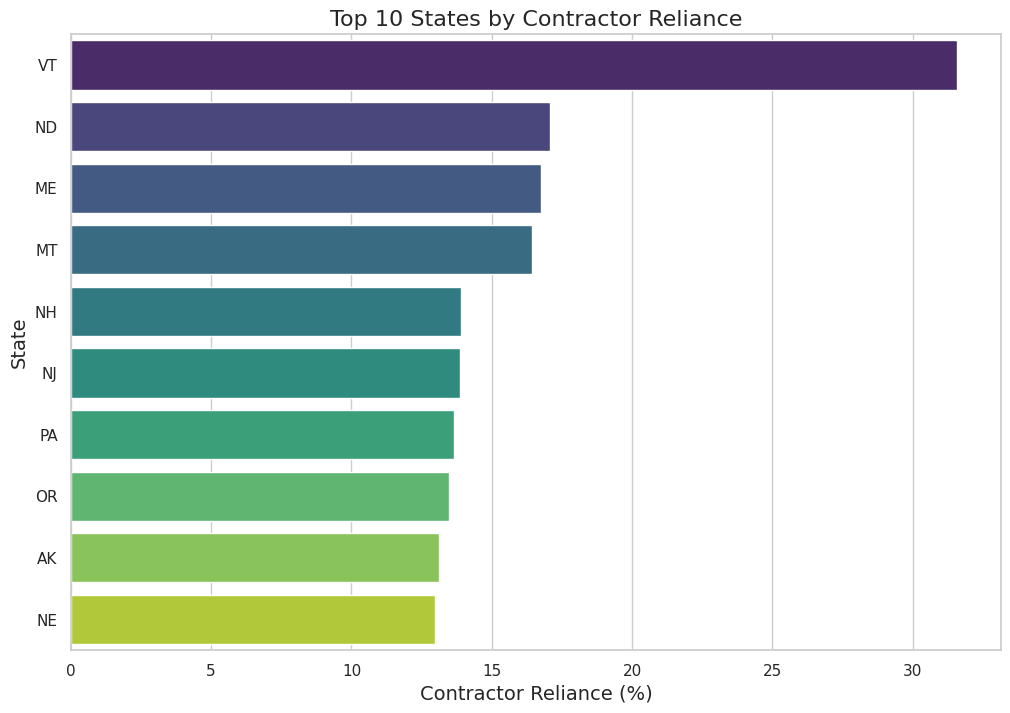

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot contractor reliance by state
plt.figure(figsize=(12, 8))
sns.barplot(x='Contractor_Reliance', y='STATE', data=contractor_reliance_by_state.head(10), palette='viridis')
plt.title('Top 10 States by Contractor Reliance', fontsize=16)
plt.xlabel('Contractor Reliance (%)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.show()

/tmp/ipykernel_5388/3990430035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contractor_Reliance', y='COUNTY_NAME', data=contractor_reliance_by_county.head(10), palette='magma')


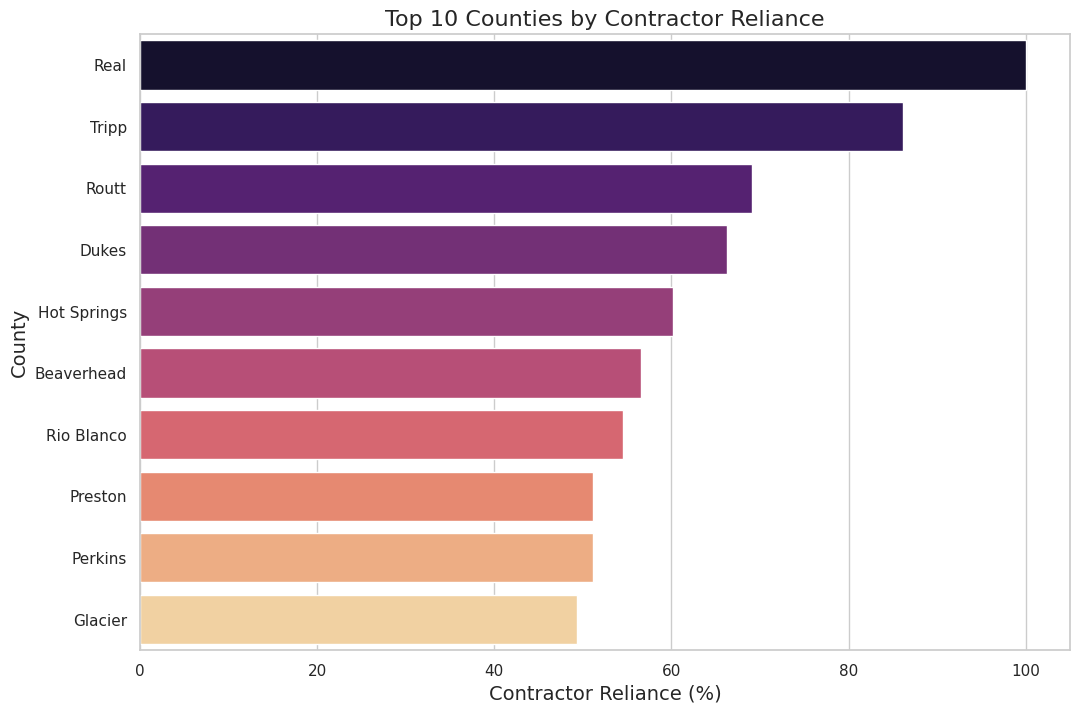

In [15]:
# Plot contractor reliance by county
plt.figure(figsize=(12, 8))
sns.barplot(x='Contractor_Reliance', y='COUNTY_NAME', data=contractor_reliance_by_county.head(10), palette='magma')
plt.title('Top 10 Counties by Contractor Reliance', fontsize=16)
plt.xlabel('Contractor Reliance (%)', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.show()

/tmp/ipykernel_5388/3912006723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contractor_Reliance', y='Ownership Type', data=ownership_in_top_states, palette='coolwarm')


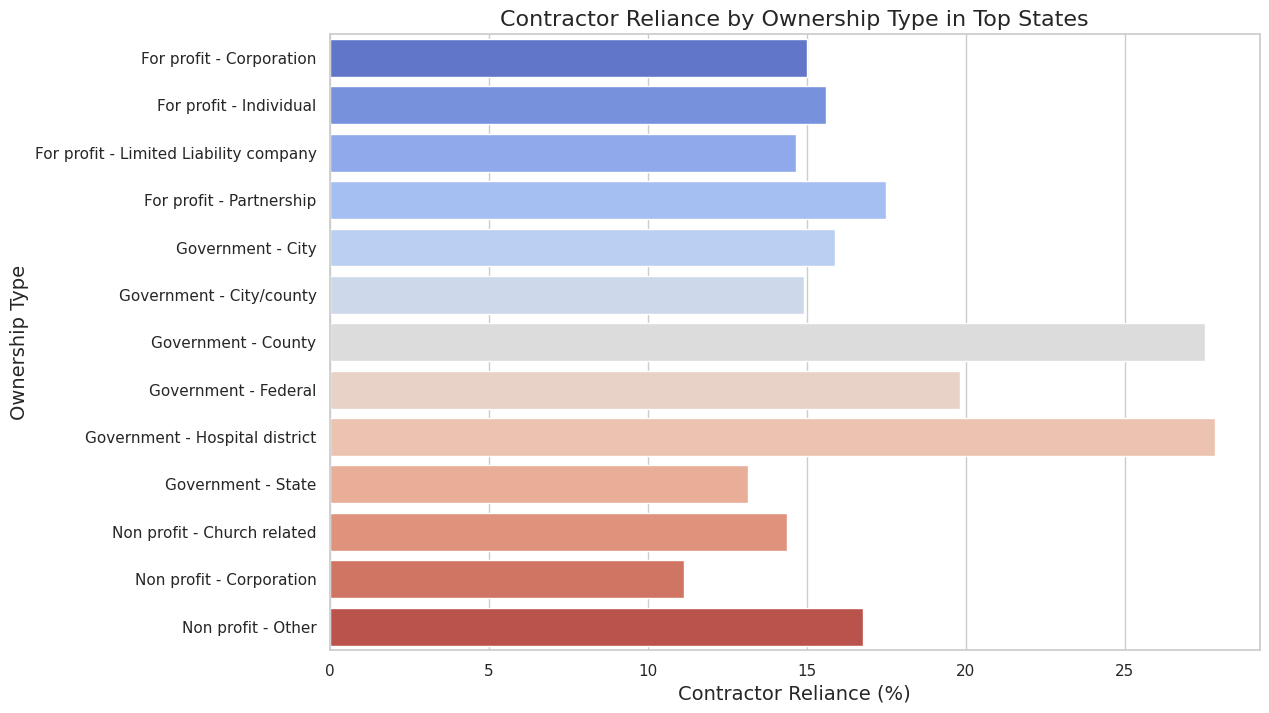

In [16]:
# Plot ownership type in top states
plt.figure(figsize=(12, 8))
sns.barplot(x='Contractor_Reliance', y='Ownership Type', data=ownership_in_top_states, palette='coolwarm')
plt.title('Contractor Reliance by Ownership Type in Top States', fontsize=16)
plt.xlabel('Contractor Reliance (%)', fontsize=14)
plt.ylabel('Ownership Type', fontsize=14)
plt.show()

/tmp/ipykernel_5388/1298452803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contractor_Reliance', y='Facility_Size', data=size_in_top_states, palette='plasma')


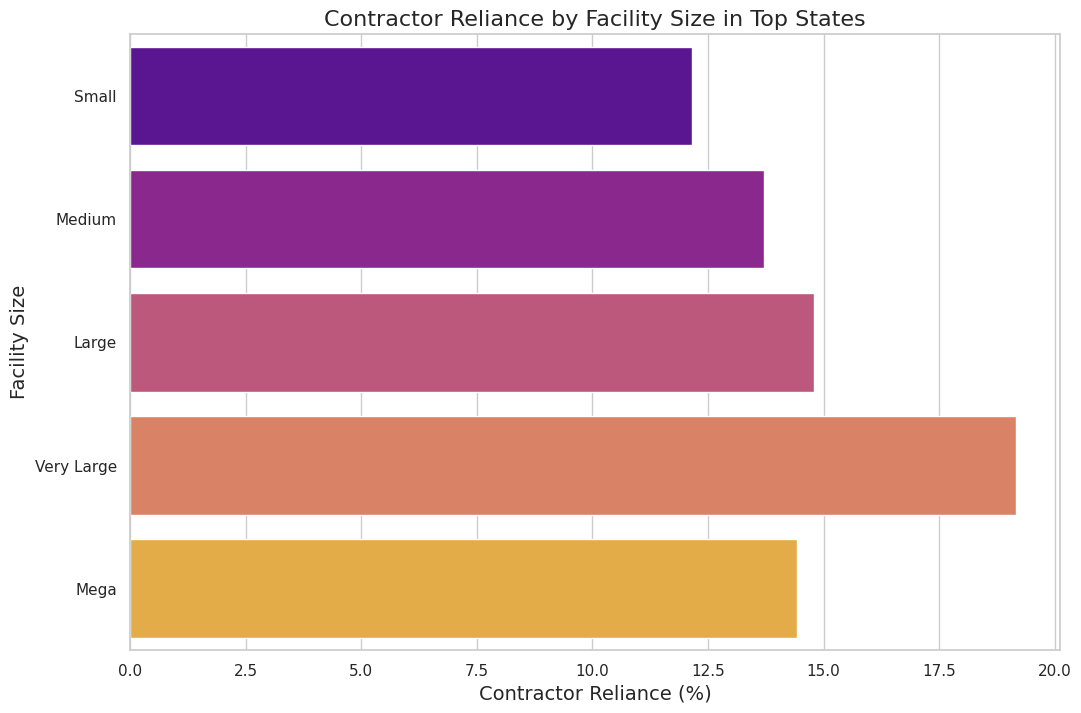

In [17]:
# Plot facility size in top states
plt.figure(figsize=(12, 8))
sns.barplot(x='Contractor_Reliance', y='Facility_Size', data=size_in_top_states, palette='plasma')
plt.title('Contractor Reliance by Facility Size in Top States', fontsize=16)
plt.xlabel('Contractor Reliance (%)', fontsize=14)
plt.ylabel('Facility Size', fontsize=14)
plt.show()

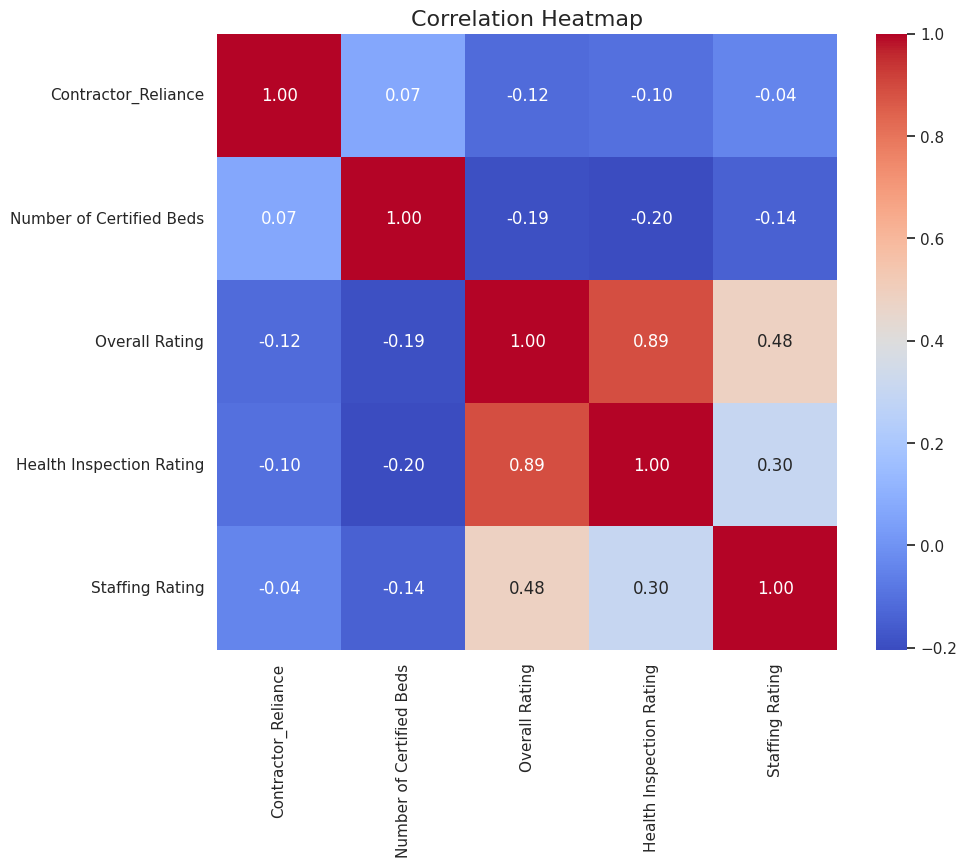

In [18]:
# Select relevant columns for correlation analysis
correlation_columns = ['Contractor_Reliance', 'Number of Certified Beds', 'Overall Rating', 'Health Inspection Rating', 'Staffing Rating']
correlation_data = merged_data[correlation_columns]

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

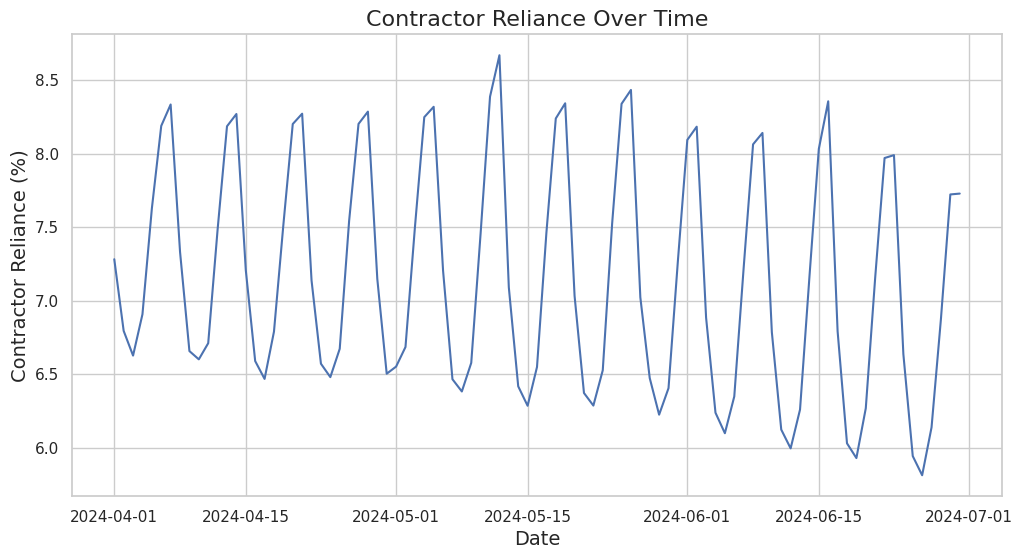

In [19]:
# Assuming 'WorkDate' is available and can be converted to datetime
merged_data['WorkDate'] = pd.to_datetime(merged_data['WorkDate'], format='%Y%m%d')

# Group by date and calculate mean contractor reliance
time_series_data = merged_data.groupby('WorkDate')['Contractor_Reliance'].mean().reset_index()

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='WorkDate', y='Contractor_Reliance', data=time_series_data)
plt.title('Contractor Reliance Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Contractor Reliance (%)', fontsize=14)
plt.show()

/tmp/ipykernel_5388/147302744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Facility_Size', data=top_state_facilities, palette='Set2')


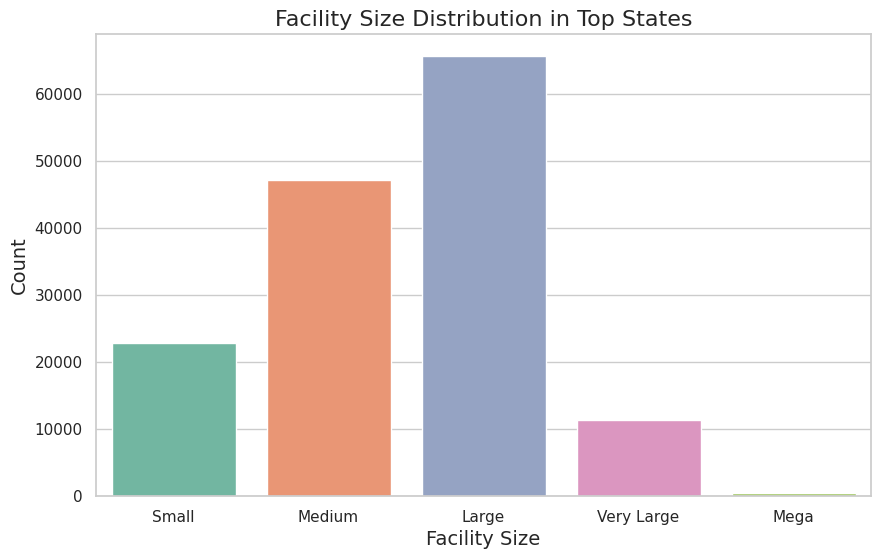

In [20]:
# Plot facility size distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Facility_Size', data=top_state_facilities, palette='Set2')
plt.title('Facility Size Distribution in Top States', fontsize=16)
plt.xlabel('Facility Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

/tmp/ipykernel_5388/2115407136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Staffing Rating', y='Contractor_Reliance', data=staffing_reliance, palette='coolwarm')


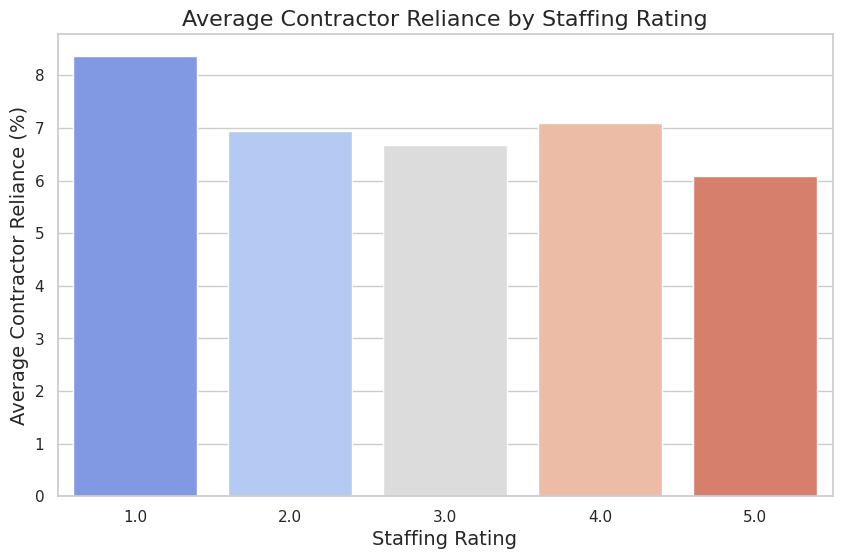

In [21]:
# Group by staffing rating and calculate average contractor reliance
staffing_reliance = merged_data.groupby('Staffing Rating')['Contractor_Reliance'].mean().reset_index()

# Bar plot of average contractor reliance by staffing rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Staffing Rating', y='Contractor_Reliance', data=staffing_reliance, palette='coolwarm')
plt.title('Average Contractor Reliance by Staffing Rating', fontsize=16)
plt.xlabel('Staffing Rating', fontsize=14)
plt.ylabel('Average Contractor Reliance (%)', fontsize=14)
plt.show()